Создание комплексной программы для защиты базы данных с использованием сложной нейронной сети требует значительных усилий. Я предоставлю вам более подробный пример, который включает следующие шаги:

1. Загрузка данных и предварительная обработка
2. Создание сложной архитектуры нейронной сети
3. Обучение и оценка модели
4. Построение графика надежности
5. Визуализация компьютерной сети

Обратите внимание, что этот пример все еще упрощен для пояснения и иллюстрации. В реальном сценарии вам нужно будет учитывать гораздо больше аспектов, таких как более сложные архитектуры нейронных сетей, улучшенная предварительная обработка данных, обработка различных типов атак и многое другое.

Epoch 1/100
90/90 [==============================] - 2s 6ms/step - loss: 0.2484 - accuracy: 0.8861 - val_loss: 0.0603 - val_accuracy: 1.0000
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0406 - accuracy: 0.9969 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9983 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 4/100
90/90 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 0.9986 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 9.0583e-04 - val_accuracy: 1.0000
Epoch 7/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 5.1792e-04 - val_accuracy: 1.0000
Epoch

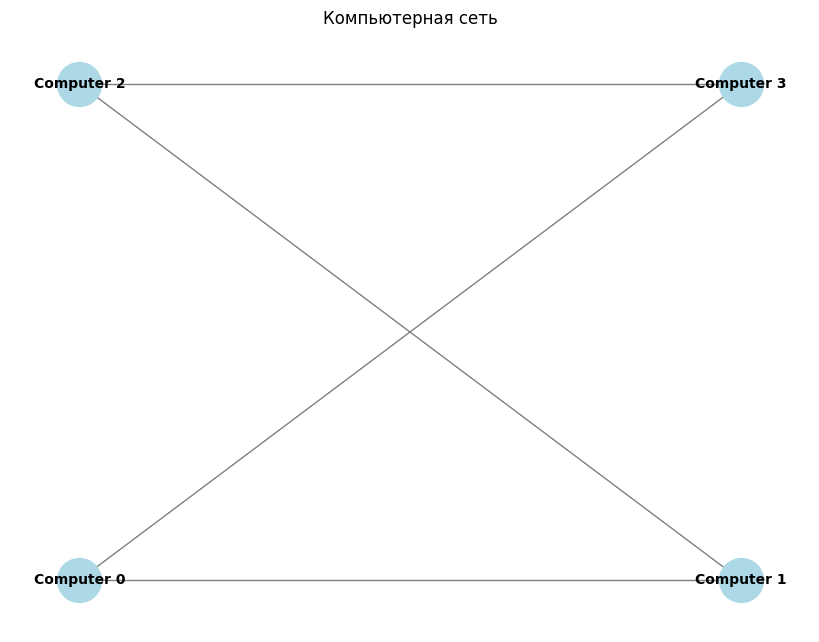

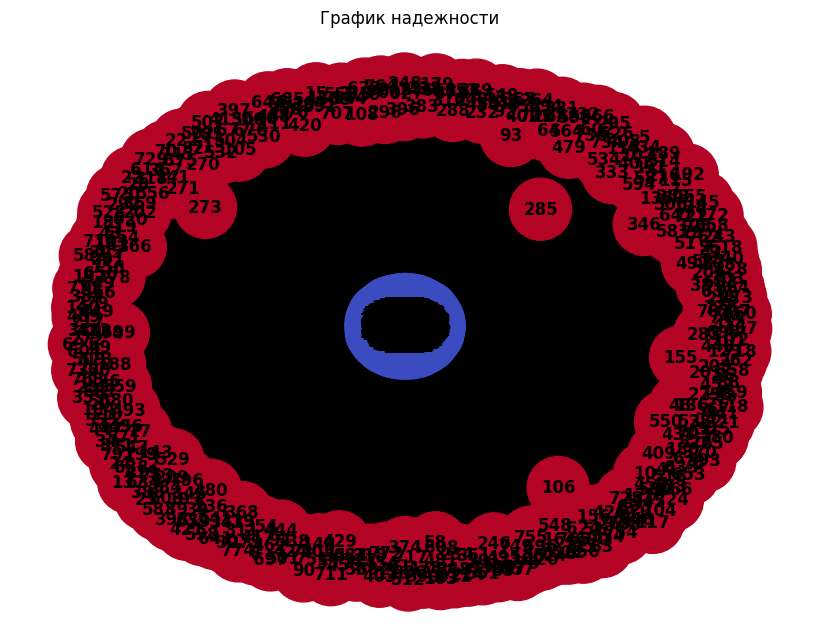

In [6]:
import numpy as np
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt

# Определите количество образцов и признаков
num_samples = 2000  # Отрегулируйте количество образцов по мере необходимости
num_features = 10   # Отрегулируйте количество функций по мере необходимости

# Шаг 1: Загрузите и предварительно обработайте данные (аналогично предыдущему примеру)
normal_data = np.random.randn(num_samples, num_features)
attack_data = np.random.randn(num_samples, num_features) + 3.0
data = np.vstack([normal_data, attack_data])
labels = np.hstack([np.zeros(num_samples), np.ones(num_samples)])
shuffle_indices = np.random.permutation(len(data))
data = data[shuffle_indices]
labels = labels[shuffle_indices]
train_ratio = 0.8
train_size = int(train_ratio * len(data))
train_data, test_data = data[:train_size], data[train_size:]
train_labels, test_labels = labels[:train_size], labels[train_size:]

# Шаг 2. Создайте более сложную архитектуру нейронной сети.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Скомпилируйте модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Шаг 3: Обучите модель
model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_split=0.1)

# Шаг 4. Делайте прогнозы на основе тестовых данных
predictions = model.predict(test_data)

# Шаг 5. Постройте график надежности
G = nx.Graph()

for i in range(len(test_data)):
    G.add_node(i, label=test_labels[i], prediction=predictions[i][0])

for i in range(len(test_data)):
    for j in range(i + 1, len(test_data)):
        if test_labels[i] == test_labels[j]:
            G.add_edge(i, j, weight=abs(predictions[i][0] - predictions[j][0]))

# Шаг 5: Создайте и визуализируйте компьютерную сеть
computer_network = nx.Graph()
computer_positions = {
    0: (0, 0),
    1: (1, 0),
    2: (0, 1),
    3: (1, 1)
}

computer_labels = {
    0: "Computer 0",
    1: "Computer 1",
    2: "Computer 2",
    3: "Computer 3"
}

computer_network.add_nodes_from(computer_positions.keys())
computer_network.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

plt.figure(figsize=(8, 6))

# Нарисуйте компьютерную сеть
nx.draw(
    computer_network,
    pos=computer_positions,
    with_labels=True,
    labels=computer_labels,
    node_size=1000,
    node_color='lightblue',
    font_size=10,
    font_color='black',
    font_weight='bold',
    edge_color='gray'
)

plt.title("Компьютерная сеть")

# Отображение графика надежности отдельно или на одном графике
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos,
    with_labels=True,
    font_weight='bold',
    node_color=[predictions[i][0] for i in G.nodes()],
    cmap=plt.get_cmap('coolwarm'),
    node_size=2000
)

plt.title("График надежности")

plt.show()


Обратите внимание, что приведенный выше код все еще довольно упрощен и служит иллюстрацией концепции. Создание действительно эффективного решения для обеспечения безопасности потребует более полных данных, более совершенных архитектур нейронных сетей и более совершенных методов борьбы с угрозами безопасности.